```

    Generate artificial classification data.

    1. Generate two classes with normal distributed features.
    2. Transform one class to log-normal distributed features.
    3. Shift one class to enlarge effect size.
    4. Generate random features.
    5. Generate pseudo class features.
    6. Generate pseudo classes.
    7. Generate data frame.
    8. Drop perfectly separated features.
    9. Save data frame as csv.
The number of informative features is the number of features that are not random features and not pseudo class features.


To know: 
Classification
training data (matrix)
labels (vector)
Samples (rows)
Features (columns)
Biomarkers (biological background)
Feature selection
Feature extraction
Feature engineering
Feature importance
Statistical distributions (normal, log-normal)
Effect size
Application areas of artificial data
Clustering/ Cluster
CSV

```


Informative features:
Informative features are the features that are relevant for the classification. They are the features that are used to distinguish between the classes. The number of informative features is the number of features that are not random features and not pseudo class features.


Pseudo-classes:

One option for an element of the generated data set is a pseudo-class. For example, this could be a patient's height or gender, which are not related to a specific disease.

The generated pseudo-class contains the same number of classes with identical distributions as the artificial biomarkers. But after the generation of the individual classes, all samples (rows) are randomly shuffled. Finally, combining the shuffled data with the original, unshuffled class labels, the pseudo-class no longer has a valid association with any class label. Consequently, no element of the pseudo-class should be recognized as relevant by a feature selection algorithm.

Random features:

Random features are features that are not relevant for the classification. They are used to test feature selection algorithms and other methods for high dimensional data with few samples.

Default values for high dimensional data with few samples (short fat data):

The number of features is much larger than the number of samples. This is a common problem in bioinformatics and other fields. In this case, the number of features is much larger than the number of samples. This can lead to overfitting and other problems. The artificial data generator can be used to generate data with a large number of features and a small number of samples. This can be used to test feature selection algorithms and other methods for high dimensional data with few samples.


## Default Values

In [16]:
# TODO kurze Einführung

number_of_samples_per_class = 15
number_of_informative_features = 30  # TODO assert complete number of features?
number_of_pseudo_class_features = 10
number_of_random_features = 10000

In [17]:
import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

warnings.filterwarnings("ignore", category=IterationLimitWarning)

## Generate complete class 1

In [18]:
class1_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class1_data_array = artificial_data_generator_tools.build_class(class_features_list=[class1_data_array])

## Show plot class 1  

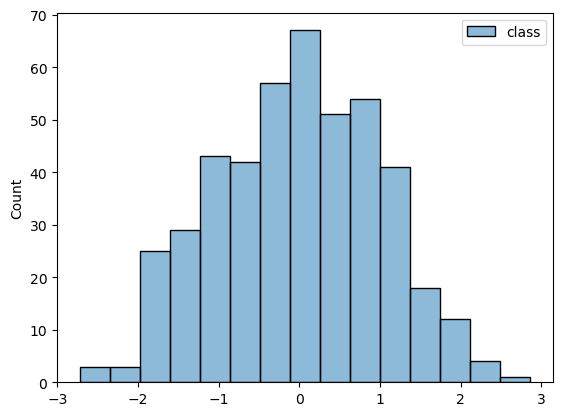

In [19]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class1_data_array)

## Transform class 1 to log-normal distributed features

In [20]:
log_normal_distributed_class1_data_array = (
    artificial_data_generator_tools.transform_normal_distributed_class_features_to_lognormal_distribution(
        class_features_data_array=class1_data_array
    )
)
assert log_normal_distributed_class1_data_array.shape[1] == number_of_informative_features

## Show plot class 1 log-normal distributed

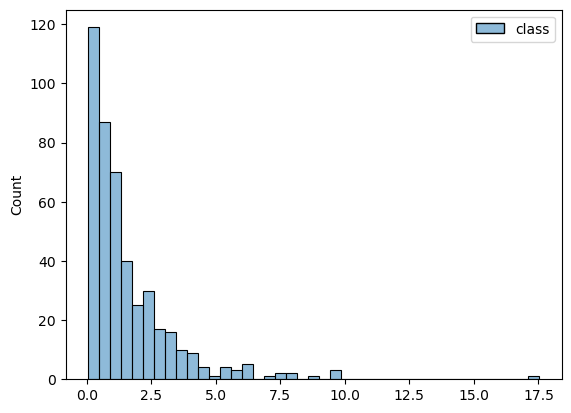

In [21]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(
    log_normal_distributed_class1_data_array,
)

## Generate complete class 2

In [22]:
class2_data_array = artificial_data_generator_tools.generate_normal_distributed_informative_features_for_one_class(
    number_of_samples=number_of_samples_per_class,
    number_of_normal_distributed_relevant_features=number_of_informative_features,
    scale=1,
)
class2_data_array = artificial_data_generator_tools.build_class(class_features_list=[class2_data_array])

## Show plot class 2

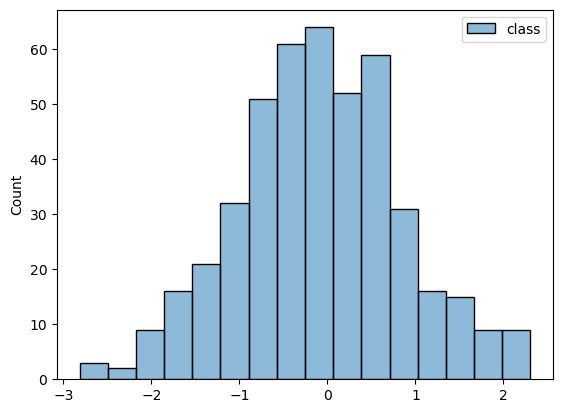

In [23]:
artificial_data_generator_tools.plot_distribution_of_class_features_for_single_class(class2_data_array)

## Show Plot Distribution

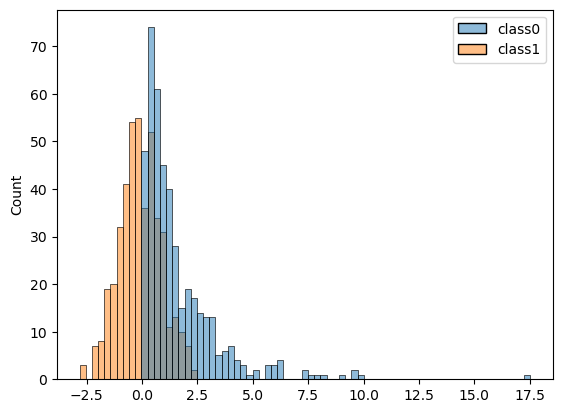

In [24]:
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [log_normal_distributed_class1_data_array, class2_data_array]
)

## Shift Class to enlarge effectsize

In [30]:
shifted_class1_data_array = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    log_normal_distributed_class1_data_array, effect_size=5
)

## Show resulting plot

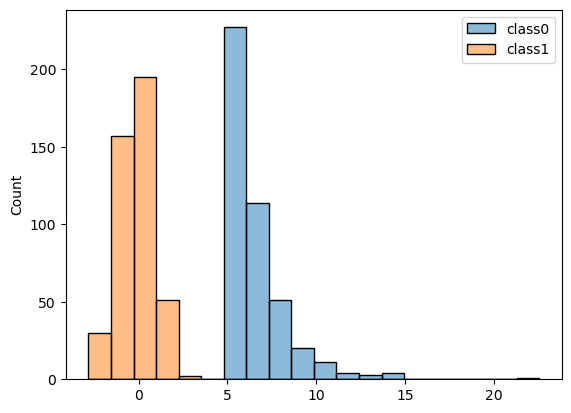

In [31]:
artificial_data_generator_tools.plot_distributions_of_all_classes([shifted_class1_data_array, class2_data_array])

The individual parts of the data are combined to form the complete data set. The data set consists of the following parts:
- class labels
- informative features
- pseudo class features
- random features

In [27]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class1_data_array, class2_data_array],
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,
)
assert (
    artificial_data_df.shape[1]
    == number_of_informative_features + number_of_pseudo_class_features + number_of_random_features + 1
)  # label column
print("The complete data set has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set has the following shape:
number of samples: 30
number of features: 10041


Perfectly separated features are features which do not overlap at any point. This means that the minimum value of one feature is larger than the maximum value of the other feature or vice versa. This case is not realistic for the discovery of new biomarkers. Therefore, these features are removed from the data set.

In [28]:
indices_of_perfectly_separated_features = artificial_data_generator_tools.find_perfectly_separated_features(
    [shifted_class1_data_array, class2_data_array]
)
separated_artificial_data_df = artificial_data_generator_tools.drop_perfectly_separated_features(
    list_of_perfectly_separated_features=indices_of_perfectly_separated_features, data_df=artificial_data_df
)
# check if first column is class label
assert separated_artificial_data_df.columns[0] == "label"

print("The complete data set without perfectly separated features has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set without perfectly separated features has the following shape:
number of samples: 30
number of features: 10041


## Save CSV

In [29]:
# number of informative features
number_of_informative_separated_features = number_of_informative_features - len(indices_of_perfectly_separated_features)
separated_artificial_data_df.to_csv(
    f"../examples/data/separated_i{number_of_informative_separated_features}.csv", index=False
)